In [1744]:
# !pip install matplotlib
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [1745]:
#defining the project variables 
#color palette for Bars with clients 

clients_color = ['#845ec2', '#ff8066', '#b0a8b9', '#4d8076', '#81969A',
          '#7A8D90', 'black', '#8A9EA1', 'red', '#9BB4B7']
#figure size for all figures 
figure_size = (10,6)

In [1746]:
#loading the data and display the first rows

df = pd.read_csv('dataframe.csv')
# df = pd.read_excel('dataframe.xlsx')
df.head()

,ID_Règlement,ID_Operation,Date_Règlement,Heure_Règlement,Paiement,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,ID_Client,...,Bénéficiaire_CPP,Solde_CPP,ID_Restaurant,Restaurant,ID_User,Prenom User,Role,Statut,Pointage,Date_Sys
0,287967,700877295,2024-02-29,08:07:37,Carte prépayée,NaN,13.5,13.5,0.0,CLT10001,...,MOUMOUN,952.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29
1,287983,700877305,2024-02-29,08:17:54,Carte prépayée,NaN,8.0,8.0,0.0,CLT10001,...,FARAIDI,921.51,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29
2,287994,700877312,2024-02-29,08:23:33,Carte prépayée,NaN,20.0,20.0,0.0,CLT10001,...,RACHIDI Salah,790.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29
3,282957,700874995,2024-02-22,11:19:17,Carte prépayée,NaN,87.0,87.0,0.0,CLT10001,...,EL AZRAK,346.23,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-22
4,282972,700874999,2024-02-22,11:31:14,Carte prépayée,NaN,5.0,5.0,0.0,CLT10001,...,ZERIOUEL,875.50,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-22


In [1747]:
#here i will display infos about my data 
# and it shape 

df.info() 

#this .info() method helps me to know my data : 
  # names and number of colmuns , non-null values ,data types Memory usage 
  

f'rows:{df.shape[0]} columns:{df.shape[1]}'

#and this to see the data shape  a pair of n° of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Règlement      15222 non-null  int64  
 1   ID_Operation      15222 non-null  int64  
 2   Date_Règlement    15222 non-null  object 
 3   Heure_Règlement   15222 non-null  object 
 4   Paiement          15222 non-null  object 
 5   Référence         99 non-null     float64
 6   Montant_Rgl       15222 non-null  float64
 7   Montant_Versé     15222 non-null  float64
 8   Montant_Rst       15222 non-null  float64
 9   ID_Client         10690 non-null  object 
 10  Client            10690 non-null  object 
 11  ID_CartePP        15222 non-null  object 
 12  Bénéficiaire_CPP  14668 non-null  object 
 13  Solde_CPP         15222 non-null  float64
 14  ID_Restaurant     15222 non-null  object 
 15  Restaurant        15222 non-null  object 
 16  ID_User           15221 non-null  object

'rows:15222 columns:22'

In [1748]:
#Display some descriptif stats 
df.describe()

,ID_Règlement,ID_Operation,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,Solde_CPP,Pointage
count,15222.000000,1.522200e+04,9.900000e+01,15222.000000,15222.000000,1.522200e+04,15222.000000,0.0
mean,304552.634673,6.415931e+08,5.541115e+15,33.954553,33.954553,-1.406516e-08,631.318233,NaN
std,38098.097638,1.482726e+08,3.240446e+15,59.042239,59.042240,1.320466e-06,671.655797,NaN
min,250355.000000,2.019016e+08,5.850000e+02,1.500000,1.500000,-9.918212e-05,1.500000,NaN
25%,271202.750000,5.005158e+08,2.759346e+15,10.000000,10.000000,0.000000e+00,100.000000,NaN
50%,299481.500000,7.008713e+08,4.293358e+15,24.000000,24.000000,0.000000e+00,330.000000,NaN
75%,334226.750000,7.008972e+08,9.432400e+15,45.000000,45.000000,0.000000e+00,960.875000,NaN
max,388034.000000,9.061058e+08,9.942445e+15,2799.527996,2799.528076,5.340576e-05,6000.000000,NaN


--So Here is a summary of what i know about the dataset  (has 15,222 rows and 22 columns)--
   
       *<<Date_Règlement>>> and Date_Sys are not in the correct datetime format i need to convert it .
       * <<Heure_Règlement>> is stored as an object (string), so we'll need to convert it to a time format 
       *<<Montant_Rgl>>, <<Montant_Versé>>, and <<Solde_CPP>> are objects I should convert them to numeric 

In [1749]:
#converting the date 
df['Date_Règlement'] = pd.to_datetime(df['Date_Règlement'])
df['Heure_Règlement'] = pd.to_datetime(df['Heure_Règlement'] ,errors='coerce')
# df['Heure_Règlement'] = pd.to_datetime(df['Heure_Règlement'], format='%H:%M:%S').dt.time


C:\Users\Youcode\AppData\Local\Temp\ipykernel_16564\1326475627.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Heure_Règlement'] = pd.to_datetime(df['Heure_Règlement'] ,errors='coerce')


In [1750]:
# and i will run ths df.dtypes command  to if changes are made 
df.dtypes

ID_Règlement                 int64
ID_Operation                 int64
Date_Règlement      datetime64[ns]
Heure_Règlement     datetime64[ns]
Paiement                    object
Référence                  float64
Montant_Rgl                float64
Montant_Versé              float64
Montant_Rst                float64
ID_Client                   object
Client                      object
ID_CartePP                  object
Bénéficiaire_CPP            object
Solde_CPP                  float64
ID_Restaurant               object
Restaurant                  object
ID_User                     object
Prenom User                 object
Role                        object
Statut                      object
Pointage                   float64
Date_Sys                    object
dtype: object

In [1751]:
# ('Montant_Rgl', 'Montant_Rst', 'Solde_CPP')  CONVERSION TO NUMERIC VALUES 
# i use coerce to force errors 
 
df['Montant_Rgl'] = pd.to_numeric(df['Montant_Rgl'], errors='coerce')
df['Montant_Rst'] = pd.to_numeric(df['Montant_Rst'], errors='coerce')
df['Solde_CPP'] = pd.to_numeric(df['Solde_CPP'], errors='coerce')

In [1752]:
# Here i will create new columns year month and week in each transaction 
# to facilate the  grouping 
df['year'] = df['Date_Règlement'].dt.year
df['month'] = df['Date_Règlement'].dt.month
df['week'] = df['Date_Règlement'].dt.isocalendar().week

# grouping by Month week and day 

mensual_transactions=df.groupby('month')['Montant_Rgl'].sum().reset_index()
weekly_transactions=df.groupby('week')['Montant_Rgl'].sum().reset_index()
daily_transactions=df.groupby('Date_Règlement')['Montant_Rgl'].sum().reset_index()

In [1753]:
# displaying the grouping dataframes in order to analyse trends 
mensual_transactions




,month,Montant_Rgl
0,1,88552.516991
1,2,89719.960037
2,3,66291.826827
3,4,51492.081983
4,5,102934.501750
5,6,78728.774981
6,7,13531.747995
7,8,18340.800014
8,9,7263.990002


In [1754]:
weekly_transactions.head(8)


,week,Montant_Rgl
0,1,22882.500000
1,2,23154.000000
2,3,23715.076992
3,4,10680.939999
4,5,21554.382015
5,6,22371.500000
6,7,21011.285007
7,8,20132.668015


In [1755]:
daily_transactions.head(8)

,Date_Règlement,Montant_Rgl
0,2024-01-01,2185.5
1,2024-01-02,3928.5
2,2024-01-03,3614.5
3,2024-01-04,3856.0
4,2024-01-05,3912.5
5,2024-01-06,2996.0
6,2024-01-07,2389.5
7,2024-01-08,3094.0


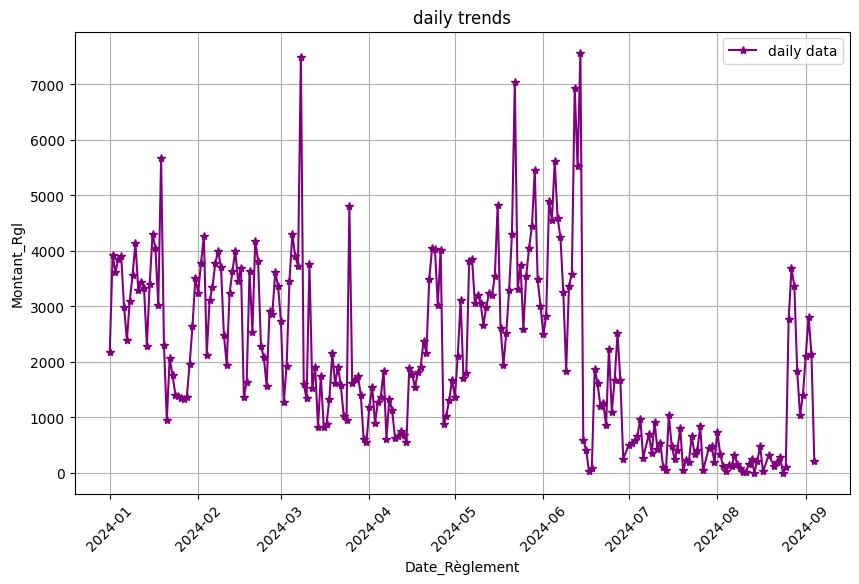

In [1756]:
#   in the section below i will create and display a bar plot 
#   for daily transactions 

plt.figure(figsize=figure_size)
plt.plot(daily_transactions['Date_Règlement'], daily_transactions['Montant_Rgl'],color = 'purple' ,label='daily data',marker='*')


plt.title('daily trends')
plt.xlabel('Date_Règlement')
plt.ylabel('Montant_Rgl')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


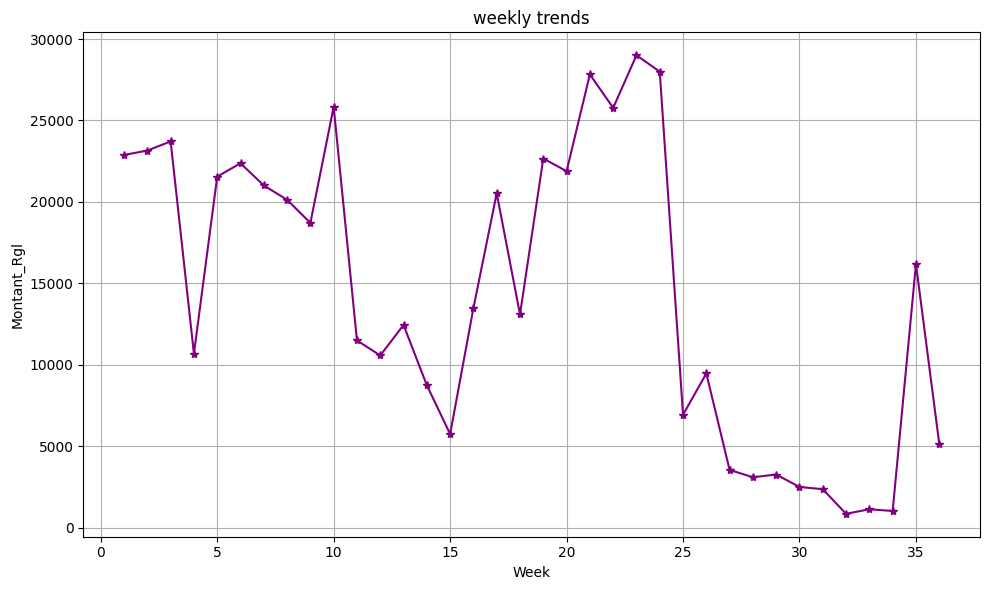

In [1757]:
#   for weekly  transactions 
plt.figure(figsize=figure_size)
plt.plot(weekly_transactions['week'], weekly_transactions['Montant_Rgl'],color = 'purple', label='Weekly data',marker='*')
plt.title('weekly trends')
plt.xlabel('Week')
plt.ylabel('Montant_Rgl')
plt.grid(True)
plt.tight_layout()
plt.show()

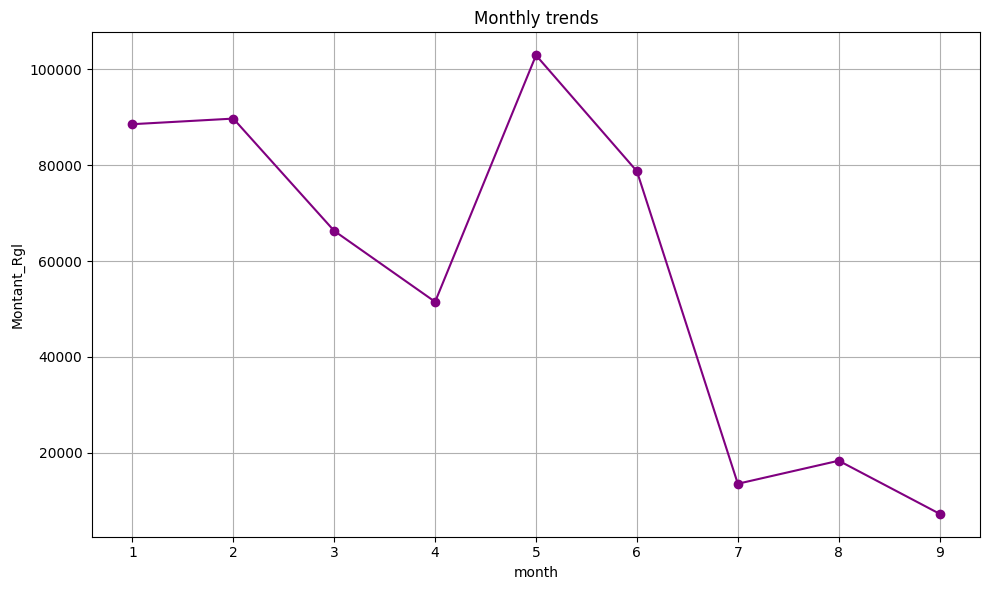

In [1758]:
plt.figure(figsize=figure_size)
plt.plot(mensual_transactions['month'], mensual_transactions['Montant_Rgl'],color = 'purple' , label='Mensual data',marker='o')
plt.title('Monthly trends')
plt.xlabel('month')
plt.ylabel('Montant_Rgl')
plt.tight_layout()
plt.grid(True)
plt.show()


PrePaid Cards using trends 

In [1759]:
ppc_using_df =df.groupby('Date_Règlement')['Solde_CPP'].mean().reset_index()

In [1760]:

ppc_using_df

,Date_Règlement,Solde_CPP
0,2024-01-01,467.240260
1,2024-01-02,484.587836
2,2024-01-03,576.126336
3,2024-01-04,421.185064
4,2024-01-05,495.011348
...,...,...
238,2024-08-31,1593.842667
239,2024-09-01,1413.277317
240,2024-09-02,1178.408626
241,2024-09-03,1057.243431


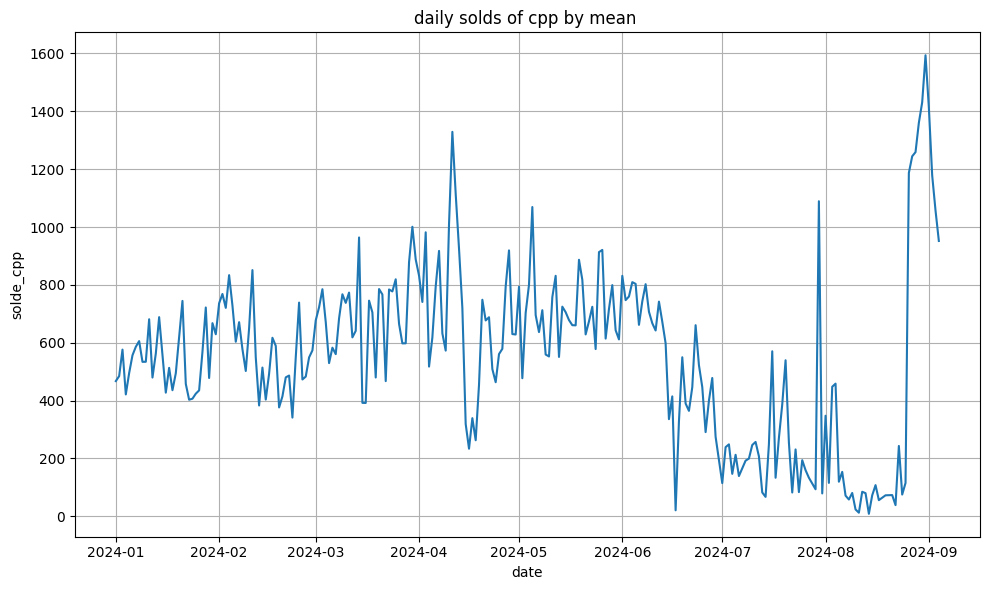

In [1761]:
plt.figure(figsize=figure_size)
plt.plot(ppc_using_df['Date_Règlement'], ppc_using_df['Solde_CPP'])
plt.title('daily solds of cpp by mean ')
plt.xlabel('date')
plt.ylabel('solde_cpp')
plt.grid(True)
plt.tight_layout()
plt.show()

** in this step i will groupe my data set by benificiaire cpp

In [1762]:
total_client_spending=df.groupby('Bénéficiaire_CPP')['Montant_Rgl'].sum().reset_index().sort_values(by='Montant_Rgl', ascending=False).head(10)
avg_spending_by_client=df.groupby('Bénéficiaire_CPP')['Montant_Rgl'].mean().reset_index().sort_values(by='Montant_Rgl', ascending=False).head(10)
df_soldes_clients=df.groupby('Bénéficiaire_CPP')['Solde_CPP'].mean().reset_index().sort_values(by = 'Solde_CPP' , ascending=False).head(10)
# cleint_behavior_dataframe =pd.merge(df_soldes_clients, total_client_spending, how='outer', on='Bénéficiaire_CPP').sort_values(by='Montant_Rgl', ascending=False).head(10)


In [1763]:
print('------average client spending by transaction-----')

print(avg_spending_by_client)


------average client spending by transaction-----
    Bénéficiaire_CPP  Montant_Rgl
735            RIFAI   347.795540
497           HOUSNI   298.506000
72            AROUKI   270.000000
26        ADOU MARIE   188.333333
726           RAZOUK   176.000000
365     EL MOUKTARID   129.400000
103    BARAKA KAMAVU   122.000000
606            MAHIR   117.500000
762          SEKKATE   110.000000
652            MPOLO   110.000000


In [1764]:

print('----------total Client spendinng ----------')

print(total_client_spending)


----------total Client spendinng ----------
    Bénéficiaire_CPP   Montant_Rgl
735            RIFAI  17737.572536
230            CHAGH  12992.532396
764          SELMANI  12726.843949
192      BOUICHENADE  11338.000000
728         REGRAGUI  10653.672295
277          DOUDOUH  10428.100000
374      EL YAAGOUBI  10137.209394
631         MINTOAMA   9119.000000
366     EL MOUNTADAR   8889.065796
805          ZAABOUL   8840.296894


In [1765]:
print(df_soldes_clients)

        Bénéficiaire_CPP    Solde_CPP
42             AIT HAJJI  6000.000000
517                JAIED  4956.833333
562               KRAIMI  2695.700000
753      SAMRANI Mohamed  1959.500000
198             BOULAICH  1959.000000
486              HASSOUN  1952.703333
345         EL KHAMLICHI  1949.066667
80            AWI Detine  1934.624000
215  BOUTGAYOUT Mohammed  1934.555000
208             BOUSMARA  1912.790000


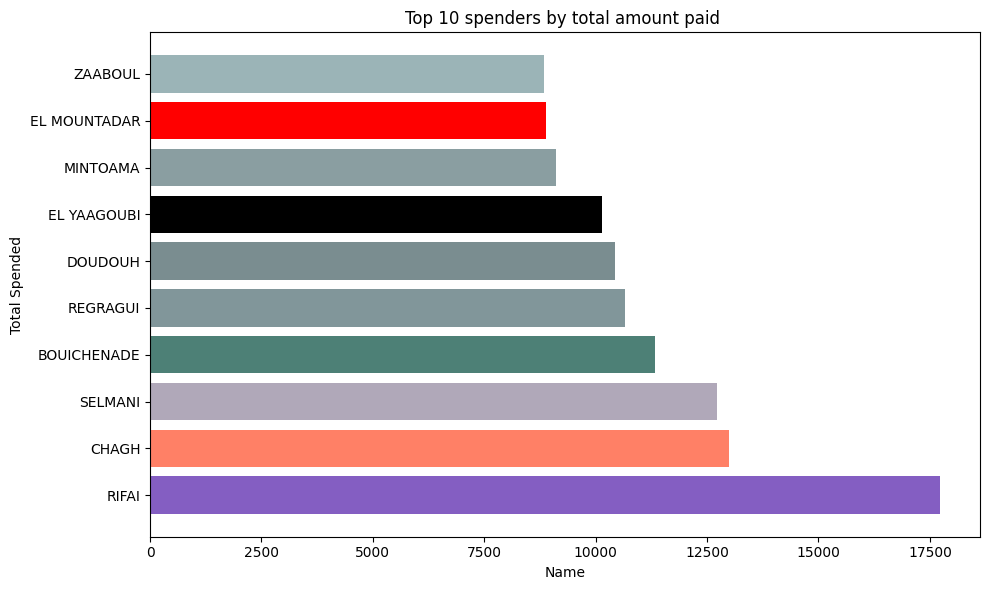

In [1766]:

plt.figure(figsize=figure_size)
plt.barh(total_client_spending['Bénéficiaire_CPP'], total_client_spending['Montant_Rgl'] , color = clients_color)
plt.title('Top 10 spenders by total amount paid ')
plt.xlabel('Name')
plt.ylabel('Total Spended')
plt.tight_layout()
plt.show()

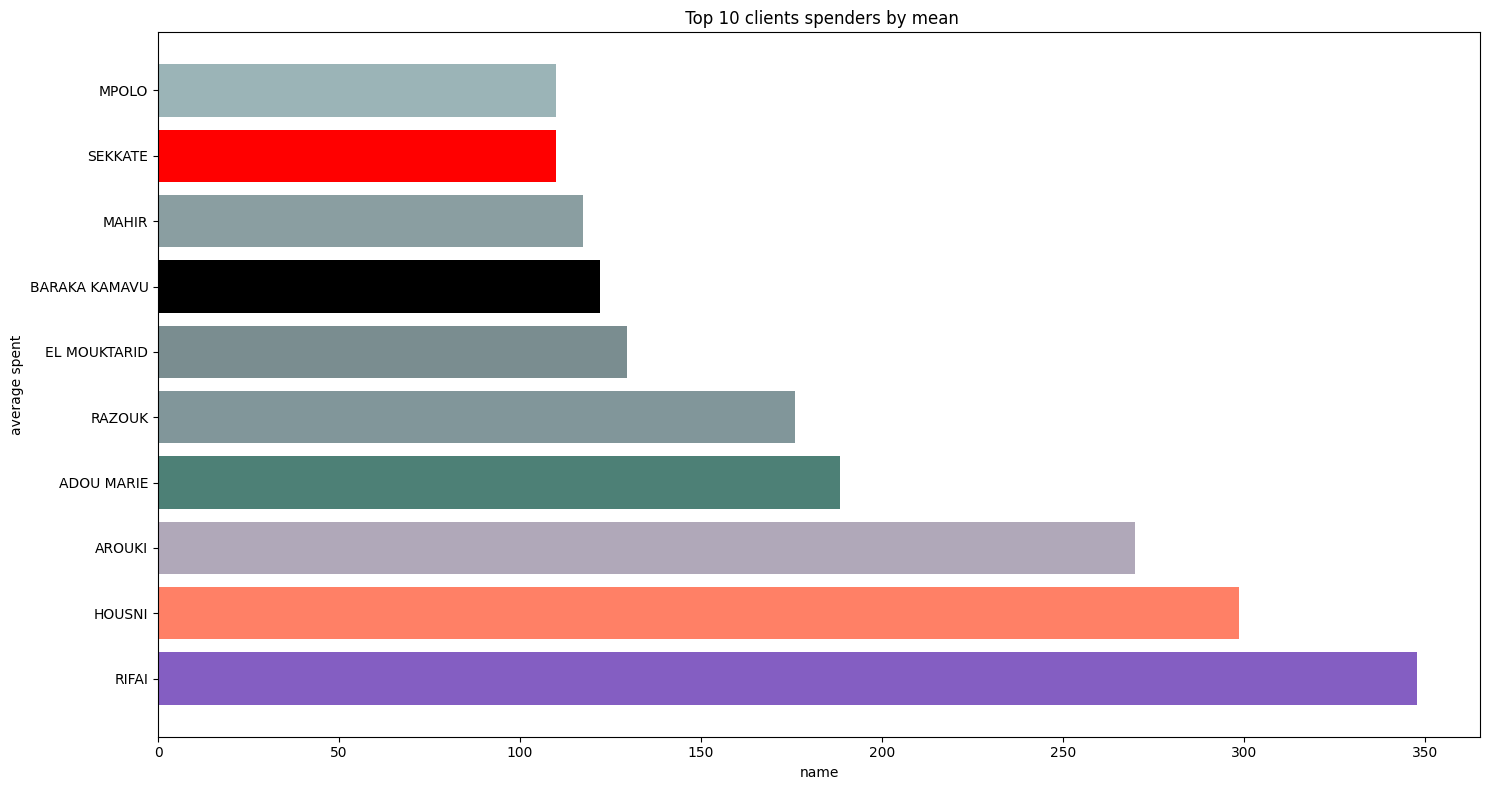

In [1767]:
plt.figure(figsize=(15, 8))
plt.barh(avg_spending_by_client['Bénéficiaire_CPP'],avg_spending_by_client['Montant_Rgl'],color = clients_color)
plt.title(' Top 10 clients spenders by mean')
plt.xlabel('name')
plt.ylabel('average spent')
plt.tight_layout()
plt.show()

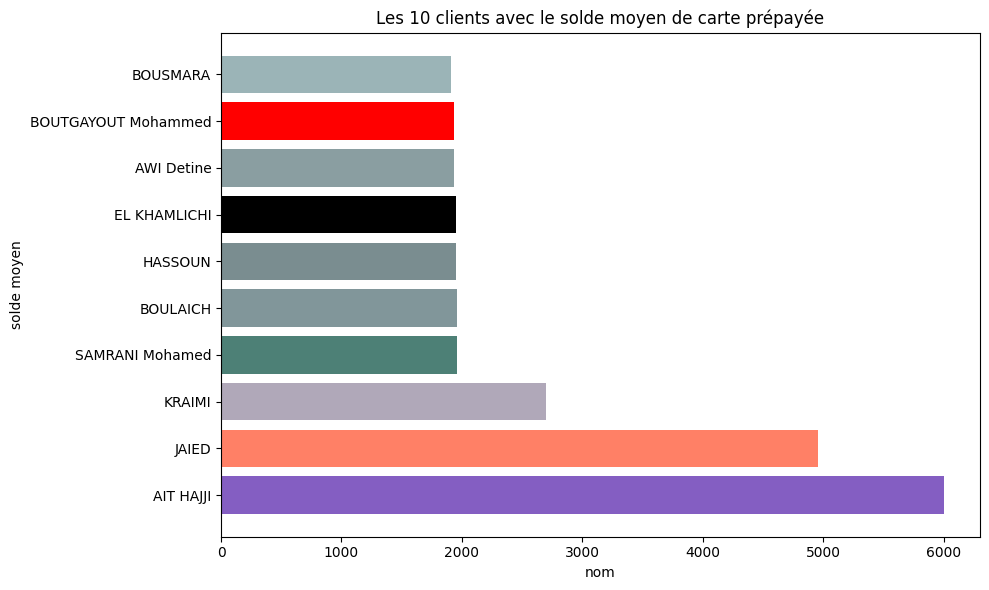

In [1768]:
plt.figure(figsize= figure_size)
plt.barh(df_soldes_clients['Bénéficiaire_CPP'],df_soldes_clients['Solde_CPP'], color = clients_color)
plt.title('Les 10 clients avec le solde moyen de carte prépayée')
plt.xlabel('nom')
plt.ylabel('solde moyen')
plt.tight_layout()
plt.show()

In [1769]:
unpaid = df[df['Montant_Rst'] > 0]
unpaid = unpaid.groupby('Bénéficiaire_CPP')['Montant_Rst'].sum().reset_index()
zero_balance = df[df['Solde_CPP'] == 0]

In [1770]:
print(unpaid)

   Bénéficiaire_CPP   Montant_Rst
0              AKDI  2.486900e-13
1          AMEZIANE  9.536743e-07
2              AQEL  4.618528e-14
3            BADSSI  4.014566e-13
4          Bentaleb  4.618528e-14
5             CHAGH  1.907349e-06
6      CHERKAOUI EL  9.237056e-14
7            DIOURI  9.536743e-07
8           DOUDOUH  1.907349e-06
9          EL AOUNI  4.156675e-13
10       EL BEZZAZI  4.973799e-14
11        EL HANAFY  4.618528e-14
12     EL MOUNTADAR  5.115908e-13
13      EL YAAGOUBI  1.907349e-06
14        EZ-ZAHORI  4.973799e-14
15   EZZAIM Mohamed  4.618528e-14
16           HOUSNI  2.145767e-06
17           JEBARI  4.973799e-14
18     KADIRI Lalla  9.536743e-07
19         KHERBACH  4.973799e-14
20          Lezzoum  4.973799e-14
21            NAFIS  4.973799e-14
22       NAIT YAZZA  3.268497e-13
23         REGRAGUI  2.288818e-05
24            RIFAI  7.629394e-05
25           SAMANI  2.664535e-14
26     SEGBEDJI Yao  1.907349e-06
27          SELMANI  4.482269e-05
28        YAO 

In [1771]:
print(zero_balance)

Empty DataFrame
Columns: [ID_Règlement, ID_Operation, Date_Règlement, Heure_Règlement, Paiement, Référence, Montant_Rgl, Montant_Versé, Montant_Rst, ID_Client, Client, ID_CartePP, Bénéficiaire_CPP, Solde_CPP, ID_Restaurant, Restaurant, ID_User, Prenom User, Role, Statut, Pointage, Date_Sys, year, month, week]
Index: []

[0 rows x 25 columns]


In [1772]:
top_unpaid=unpaid.sort_values(by='Montant_Rst', ascending=False).head(10)
print(top_unpaid)

   Bénéficiaire_CPP   Montant_Rst
24            RIFAI  7.629394e-05
27          SELMANI  4.482269e-05
23         REGRAGUI  2.288818e-05
16           HOUSNI  2.145767e-06
26     SEGBEDJI Yao  1.907349e-06
13      EL YAAGOUBI  1.907349e-06
5             CHAGH  1.907349e-06
8           DOUDOUH  1.907349e-06
18     KADIRI Lalla  9.536743e-07
1          AMEZIANE  9.536743e-07


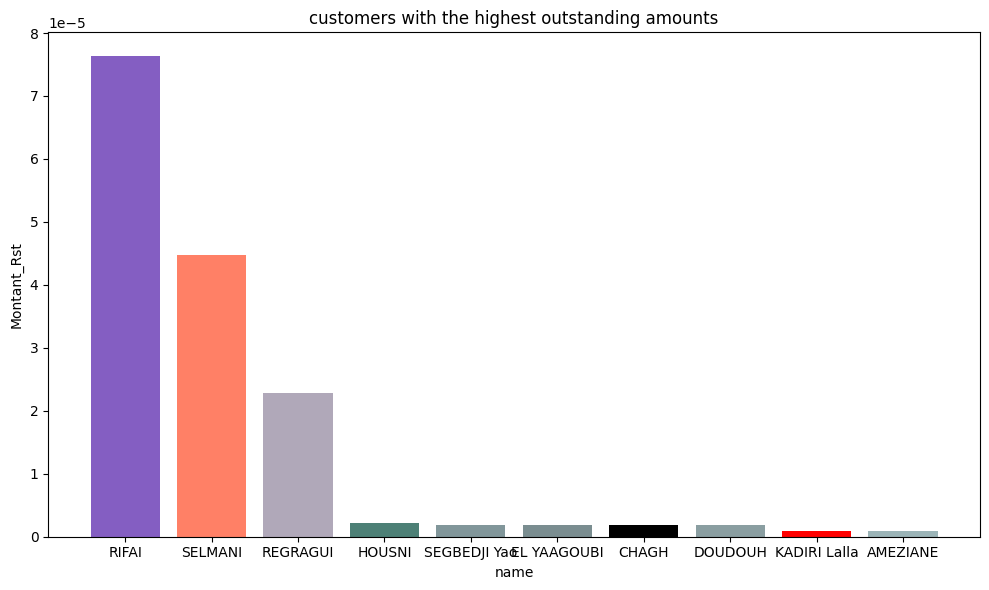

In [1773]:

plt.figure(figsize=figure_size)
plt.bar(top_unpaid['Bénéficiaire_CPP'],top_unpaid['Montant_Rst'] , color  = clients_color)
plt.title('customers with the highest outstanding amounts')
plt.xlabel('name')
plt.ylabel('Montant_Rst')
plt.tight_layout()
plt.show()

Analyse des heures de pointe et des lieux les plus performants

In [1774]:
total_revenu_by_place=df.groupby('Restaurant')['Montant_Rgl'].sum().reset_index(name='Total_Revenue')

In [1775]:
print('--------- Total Revenue By Place (restaurant)------------' , '\n')

print(total_revenu_by_place)

--------- Total Revenue By Place (restaurant)------------ 

                                Restaurant  Total_Revenue
0  Café - Boulangerie - Pâtisserie - Rabat  183514.500000
1                         Epicerie - Rabat    7903.250010
2                    L'Casis Cafétéria HCZ   21571.500000
3                        Lavomatic - Rabat   46274.139999
4        Pharmacie & Parapharmacie - Rabat   33323.810572
5         Restaurant Gastronomique - Rabat   16405.000000
6                   Snack Pizzeria - Rabat  207864.000000


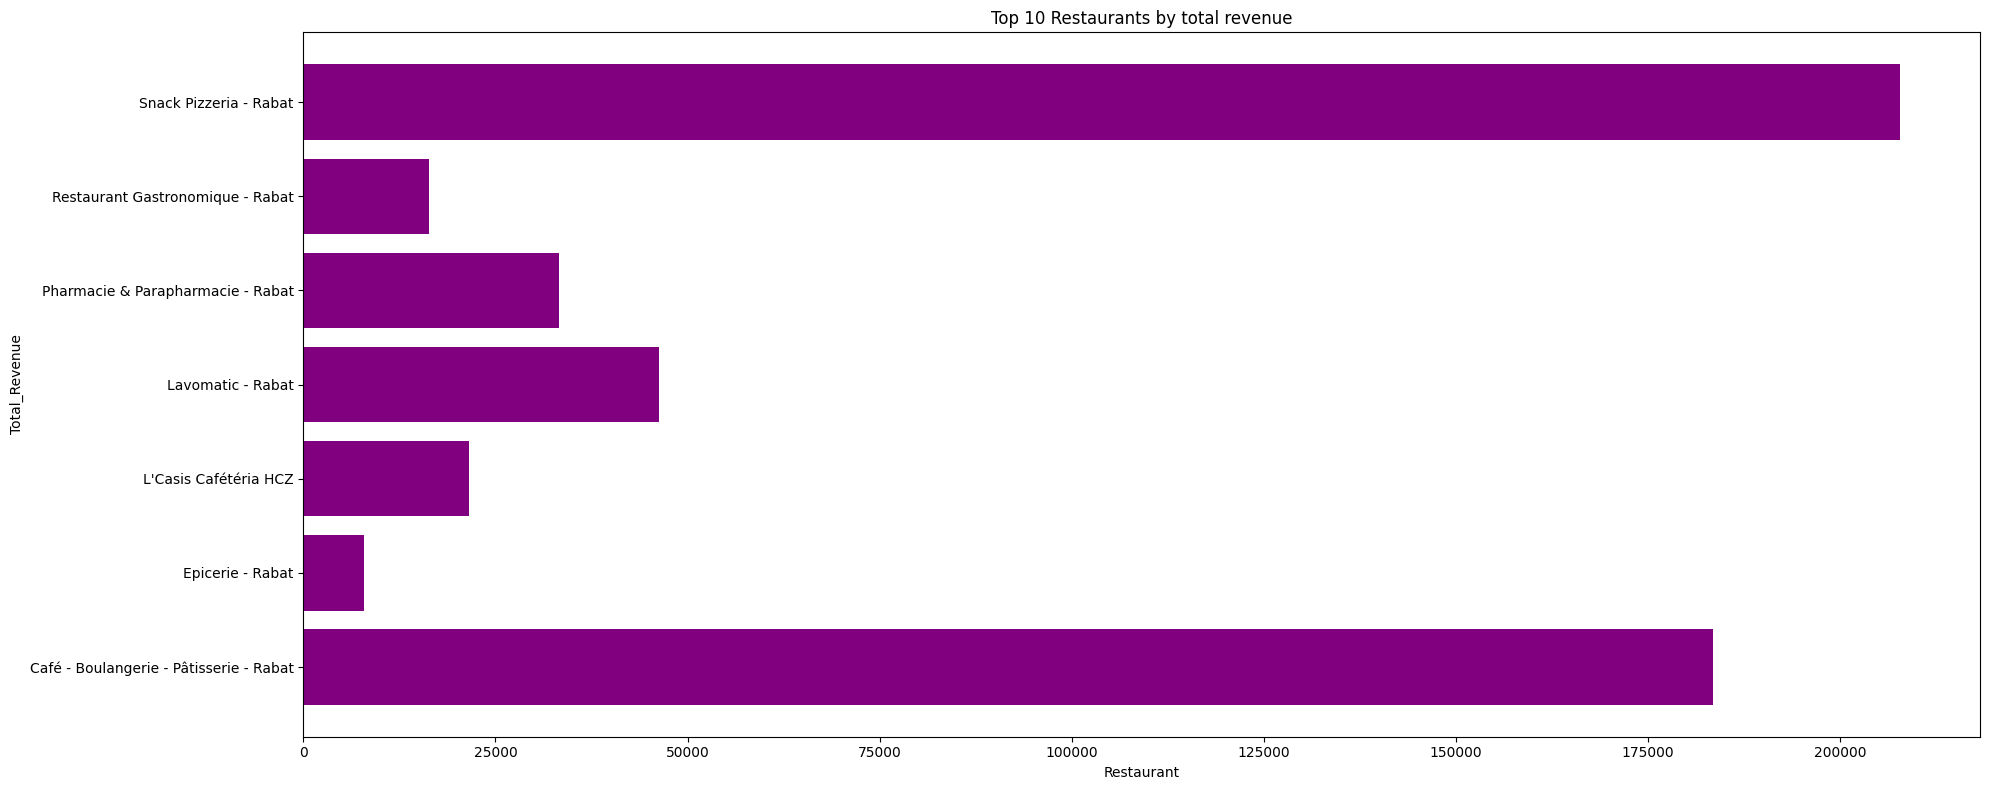

In [1776]:
# in this section i'll create a plot to see total revenue by restaurant 

plt.figure(figsize=(20, 8))
plt.barh(total_revenu_by_place['Restaurant'],total_revenu_by_place['Total_Revenue'] , color = 'purple')
plt.title('Top 10 Restaurants by total revenue')
plt.xlabel('Restaurant')
plt.ylabel('Total_Revenue')
plt.tight_layout()
plt.show()

In [1777]:
#here i will identify the peak hours by calculating how much transaction by hours 
#first i will convert the columns ['Heure_Règlement'] to datetime format 
#and i'll create a new column within my df from the ['Heure_Règlement']  to be like and index for  the peak hours dataframe 
# that i'll create next .......
  
df['Heure_Règlement'] = pd.to_datetime(df['Heure_Règlement'], format='%H:%M:%S')
df['Heure'] = df['Heure_Règlement'].dt.hour
df['Heure_Règlement'] = pd.to_datetime(df['Heure_Règlement'], format='%H:%M:%S').dt.time


In [1778]:
# in the section below i'll create the peak hours dataframe 
  # by counting number of transactions [ID_Operation] in each hour of the day 
peak_hours = df.groupby(['Restaurant','Heure'])['Montant_Rgl'].sum().reset_index(name='sum')
# peak_pivoted  = df.pivot_table(values='Montant_Rgl',index=['Restaurant','Heure_Règlement'] ,aggfunc=['sum'])

In [1779]:
print('---------------------------------')
peak_hours
# peak_pivoted

---------------------------------


,Restaurant,Heure,sum
0,Café - Boulangerie - Pâtisserie - Rabat,1,97.5
1,Café - Boulangerie - Pâtisserie - Rabat,4,102.5
2,Café - Boulangerie - Pâtisserie - Rabat,6,146.5
3,Café - Boulangerie - Pâtisserie - Rabat,7,3411.5
4,Café - Boulangerie - Pâtisserie - Rabat,8,7877.0
...,...,...,...
98,Snack Pizzeria - Rabat,19,33479.0
99,Snack Pizzeria - Rabat,20,19934.0
100,Snack Pizzeria - Rabat,21,20798.0
101,Snack Pizzeria - Rabat,22,16698.0


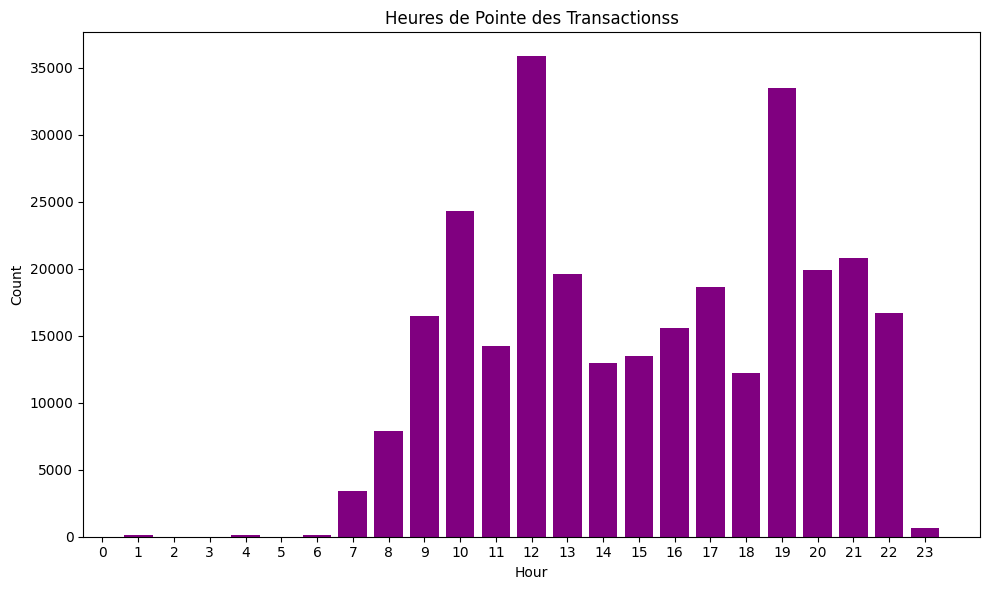

In [1780]:
#ploting the peak hours trends to see in wich hours 

plt.figure(figsize=figure_size)
plt.bar(peak_hours['Heure'],peak_hours['sum'],color = 'purple')
plt.title('Heures de Pointe des Transactionss')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()





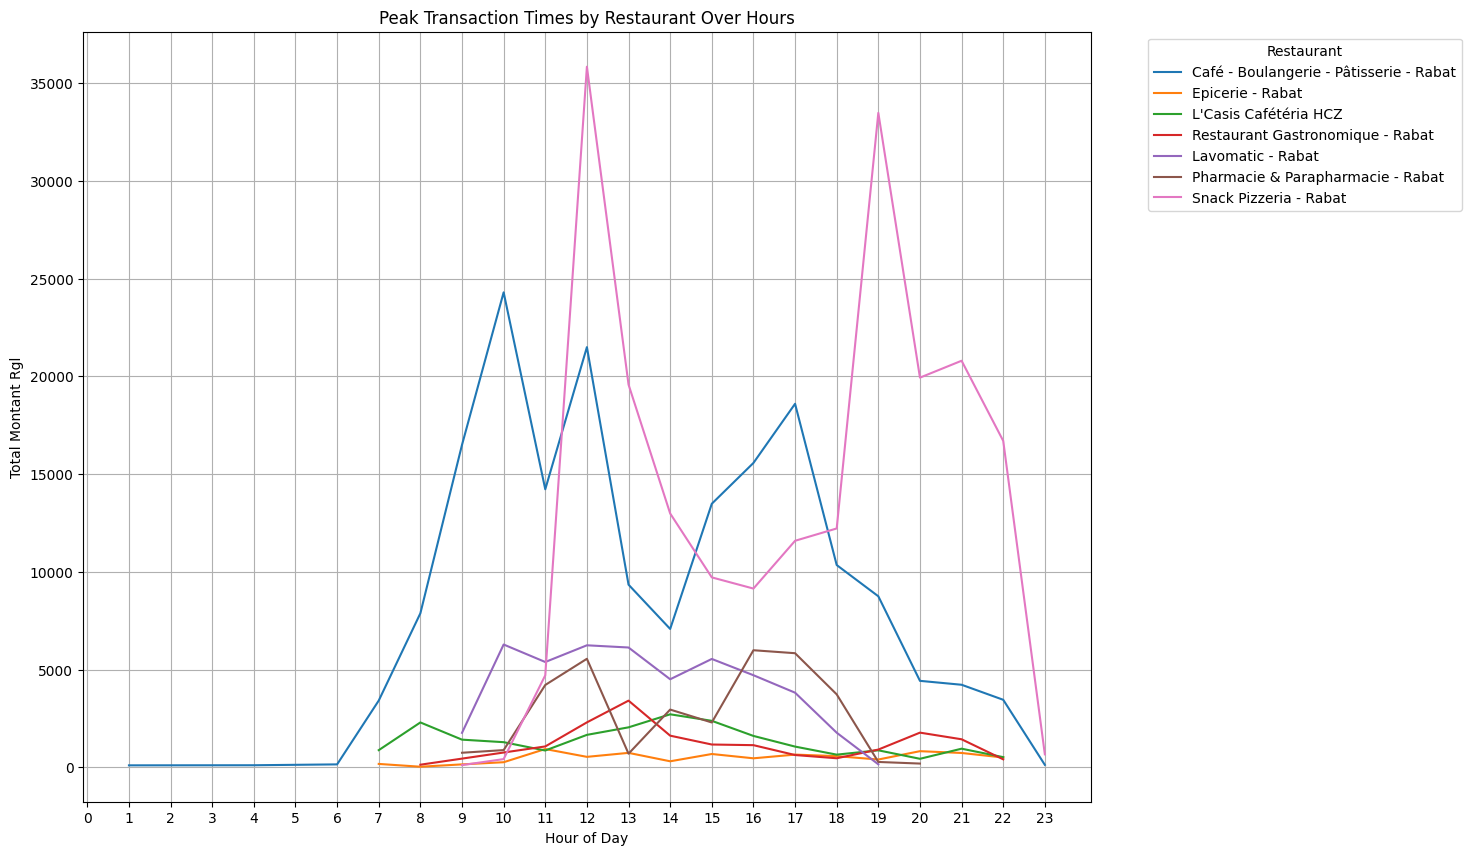

In [1781]:
grouped = df.groupby(['Heure', 'Restaurant'])['Montant_Rgl'].sum().reset_index()
# peak_hours = df.groupby(['Restaurant','Heure'])['Montant_Rgl'].sum().reset_index(name='sum')
plt.figure(figsize=(13,10))
# Plotting each restaurant's peak times
for restaurant in grouped['Restaurant'].unique():
    subset = grouped[grouped['Restaurant'] == restaurant]
    plt.plot(subset['Heure'], subset['Montant_Rgl'], marker='', label=restaurant)

# Add title and labels

plt.title('Peak Transaction Times by Restaurant Over Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Total Montant Rgl')
plt.xticks(range(0, 24))  # Show all hours

plt.grid()
plt.legend(title='Restaurant', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

 Detect anomalies in transaction amounts (Montant-rgl)
 using the interquartile range (IQR) method

In [1782]:
# Detection des anomalies dans les montants des transactions en utilisant l ecart interquartile (IQR)
Q1 = df['Montant_Rgl'].quantile(0.25)
Q3 = df['Montant_Rgl'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites
Limite_inf= Q1 - 1.5 * IQR
limite_sup= Q3 + 1.5  *IQR

# Identification des valeurs aberrantes
df_Valeurs_anormales = df[(df['Montant_Rgl'] < Limite_inf) | (df['Montant_Rgl'] > limite_sup)]


In [1783]:
df_Valeurs_anormales

,ID_Règlement,ID_Operation,Date_Règlement,Heure_Règlement,Paiement,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,ID_Client,...,ID_User,Prenom User,Role,Statut,Pointage,Date_Sys,year,month,week,Heure
71,288239,700877453,2024-02-29,10:49:57,Carte prépayée,NaN,99.500000,99.500000,0.000000e+00,CLT10001,...,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29,2024,2,9,10
131,288404,501511858,2024-02-29,12:27:34,Carte prépayée,NaN,100.000000,100.000000,0.000000e+00,CLT10002,...,USR10022,Fadwa,Caissier,Validé,NaN,2024-02-29,2024,2,9,12
169,283498,400440939,2024-02-22,18:43:09,Carte prépayée,NaN,110.000000,110.000000,0.000000e+00,NaN,...,USR10001,Ayoub,Caissier,Validé,NaN,2024-02-22,2024,2,8,18
170,283499,901000389,2024-02-22,18:50:52,Carte prépayée,3.751366e+15,971.572010,971.572021,-1.144409e-05,CLT10002,...,USR10026,Kawtar,Caissier,Validé,NaN,2024-02-22,2024,2,8,18
181,286528,501511848,2024-02-27,12:32:42,Carte prépayée,NaN,200.000000,200.000000,0.000000e+00,CLT10002,...,USR10022,Fadwa,Caissier,Validé,NaN,2024-02-27,2024,2,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14682,383843,901003237,2024-08-28,15:20:11,Carte prépayée,4.293358e+15,297.600006,297.600006,3.979039e-13,CLT10002,...,USR10028,Mourad,Caissier,Validé,NaN,2024-08-28,2024,8,35,15
14763,384471,550502224,2024-08-29,14:02:20,Carte prépayée,NaN,105.000000,105.000000,0.000000e+00,NaN,...,USR10002,Souhail,Caissier,Validé,NaN,2024-08-29,2024,8,35,14
14789,384720,550502229,2024-08-29,21:10:47,Carte prépayée,NaN,128.000000,128.000000,0.000000e+00,NaN,...,USR10008,Souhail,Caissier,Validé,NaN,2024-08-29,2024,8,35,21
14856,385550,906104824,2024-08-31,11:44:30,Carte prépayée,NaN,186.300003,186.300003,1.989520e-13,CLT10001,...,USR10030,Abdelkrim,Caissier,Validé,NaN,2024-08-31,2024,8,35,11


In [1784]:
df_Valeurs_anormales_grouped_clients = df_Valeurs_anormales.groupby('Bénéficiaire_CPP').size().reset_index(name='Count').sort_values(by='Count',ascending=False).head(50)
df_Valeurs_anormales_grouped_restaurant = df_Valeurs_anormales.groupby('Restaurant').size().reset_index(name='Count').sort_values(by='Count',ascending=False)
df_Valeurs_anormales_grouped_heure = df_Valeurs_anormales.groupby('Heure').size().reset_index(name='Count').sort_values(by='Count',ascending=False)


Displaying outliers grouped by customers ,retaurants ,and hours 
    

In [1785]:
df_Valeurs_anormales_grouped_clients

,Bénéficiaire_CPP,Count
24,BOUICHENADE,37
27,CHAGH,35
114,RIFAI,32
113,REGRAGUI,23
53,EL YAAGOUBI,20
119,SELMANI,17
38,DOUDOUH,14
62,FARAIDI,13
131,ZAABOUL,13
51,EL MOUNTADAR,11


In [1786]:
df_Valeurs_anormales_grouped_restaurant

,Restaurant,Count
3,Lavomatic - Rabat,181
0,Café - Boulangerie - Pâtisserie - Rabat,142
6,Snack Pizzeria - Rabat,119
4,Pharmacie & Parapharmacie - Rabat,56
5,Restaurant Gastronomique - Rabat,53
2,L'Casis Cafétéria HCZ,9
1,Epicerie - Rabat,4


In [1787]:
df_Valeurs_anormales_grouped_heure

,Heure,Count
5,13,74
4,12,71
8,16,61
7,15,56
3,11,54
9,17,44
6,14,42
2,10,41
10,18,36
13,21,25


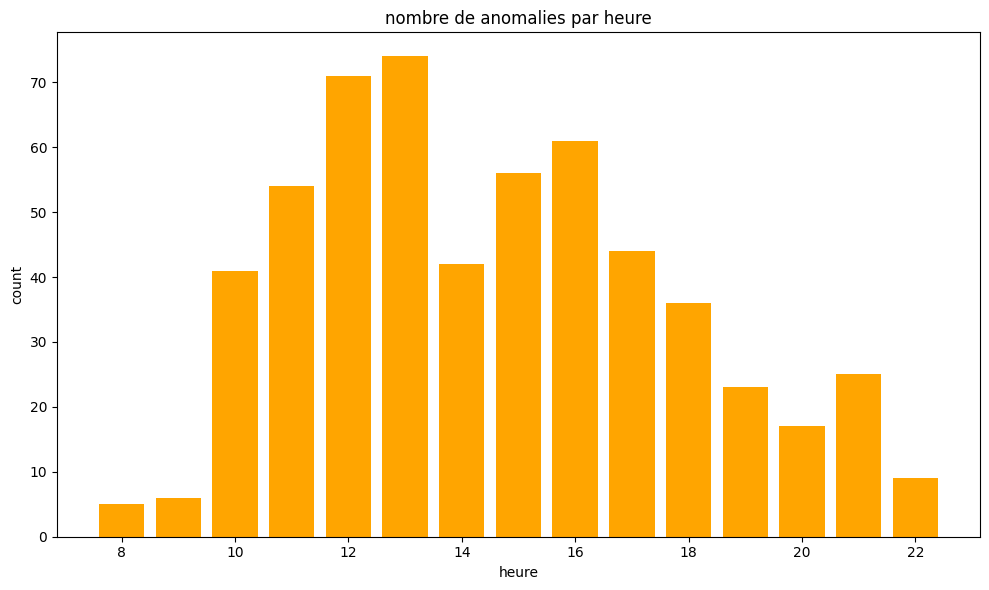

In [1788]:
# Visualization 1: Bar chart for anomalies by heure
plt.figure(figsize=figure_size)
plt.bar(df_Valeurs_anormales_grouped_heure['Heure'],df_Valeurs_anormales_grouped_heure['Count'],color= 'orange')
plt.title('nombre de anomalies par heure')
plt.xlabel('heure')
plt.ylabel('count')
plt.tight_layout()
plt.show()

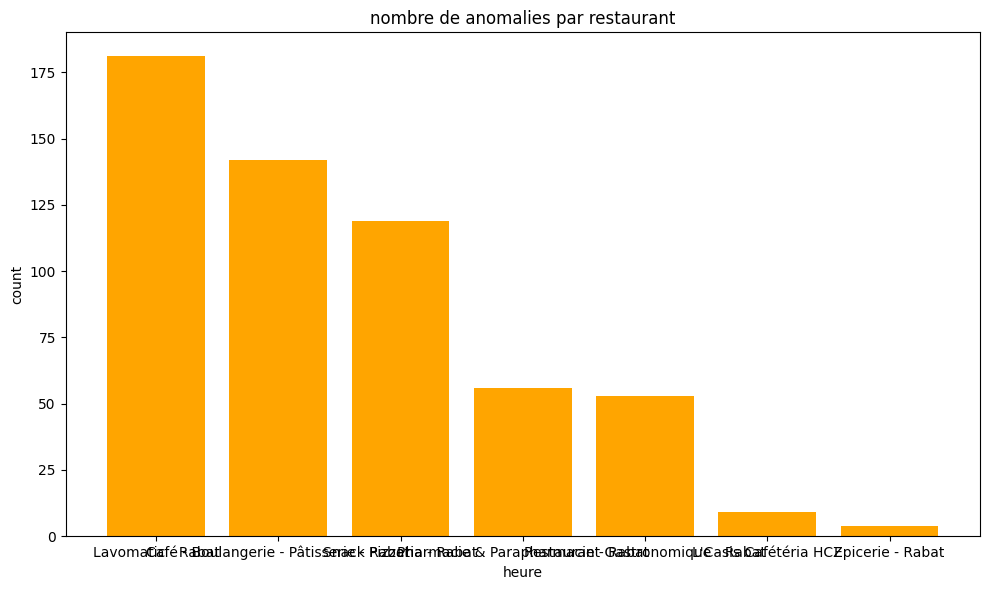

In [1789]:
# Visualization 1: Bar chart for anomalies by restaurant 
plt.figure(figsize=figure_size)
plt.bar(df_Valeurs_anormales_grouped_restaurant['Restaurant'],df_Valeurs_anormales_grouped_restaurant['Count'], color= 'orange')
plt.title('nombre de anomalies par restaurant')
plt.xlabel('heure')
plt.ylabel('count')
plt.tight_layout()
plt.show()

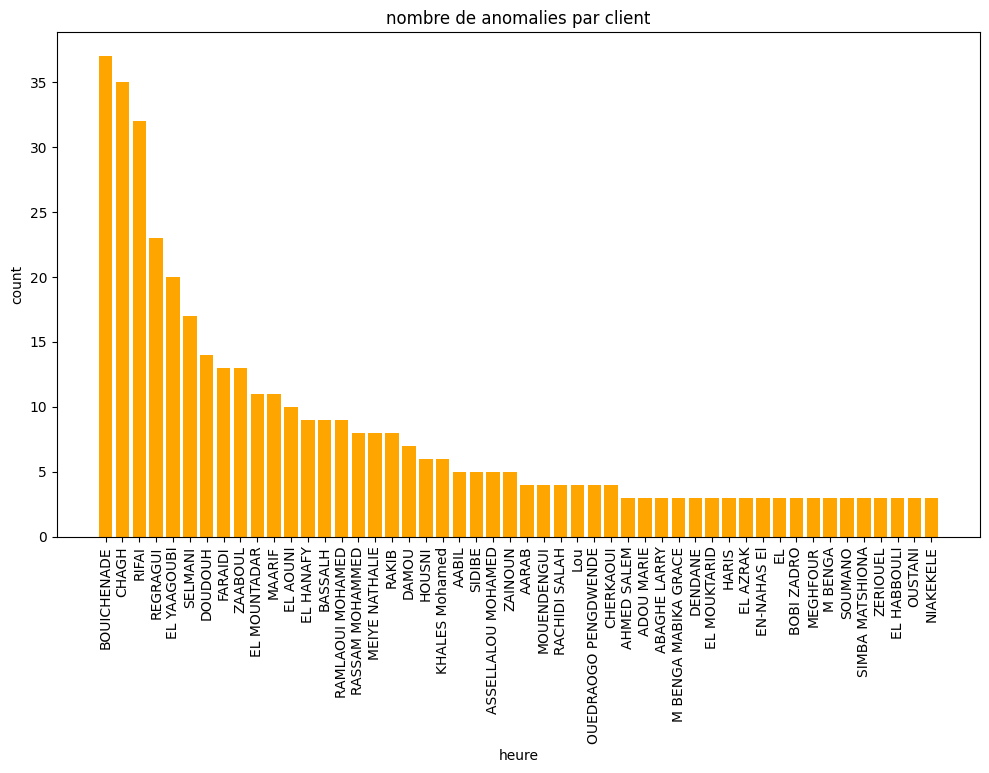

In [1790]:
plt.figure(figsize=figure_size)
plt.bar(df_Valeurs_anormales_grouped_clients['Bénéficiaire_CPP'],df_Valeurs_anormales_grouped_clients['Count'],color='orange')
plt.title('nombre de anomalies par client')
plt.xlabel('heure')
plt.ylabel('count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

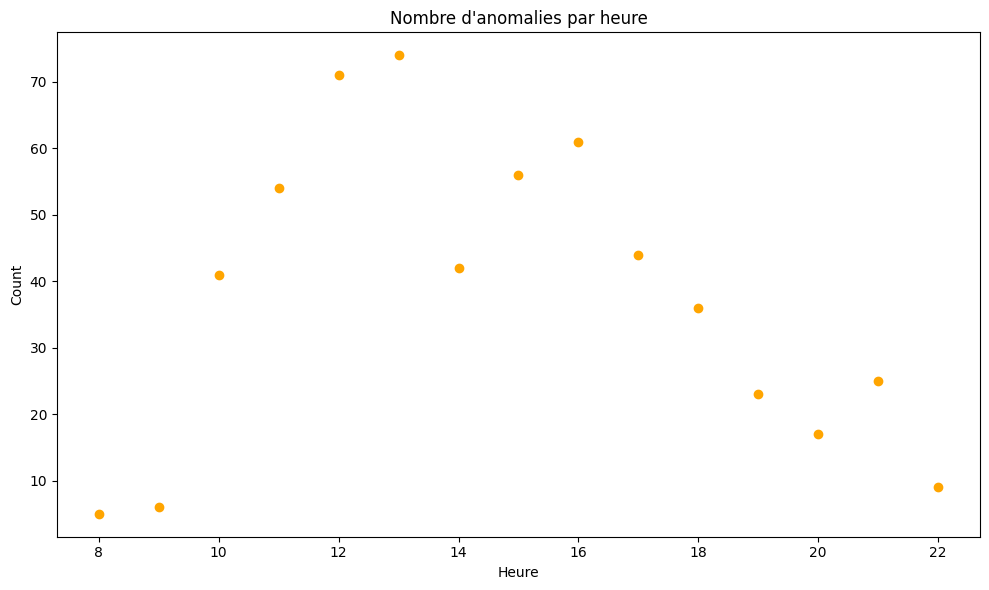

In [1791]:
# Visualization 1: Scatter plot for anomalies by heure
plt.figure(figsize=figure_size)
plt.scatter(df_Valeurs_anormales_grouped_heure['Heure'], df_Valeurs_anormales_grouped_heure['Count'], color='orange')
plt.title('Nombre d\'anomalies par heure')
plt.xlabel('Heure')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


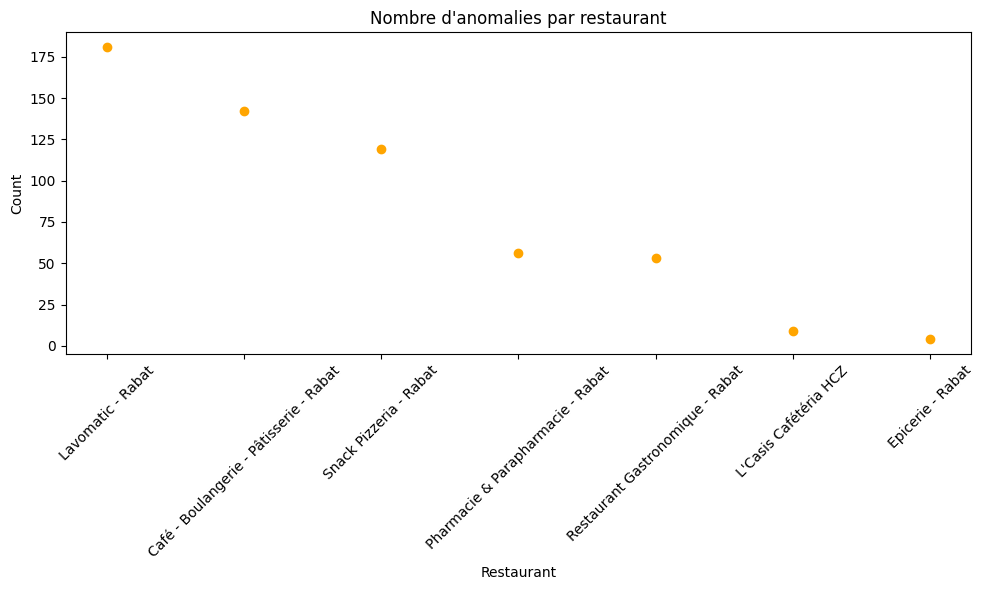

In [1792]:
# Visualization 1: Scatter plot for anomalies by restaurant
plt.figure(figsize=figure_size)
plt.scatter(df_Valeurs_anormales_grouped_restaurant['Restaurant'], df_Valeurs_anormales_grouped_restaurant['Count'], color='orange')
plt.title('Nombre d\'anomalies par restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


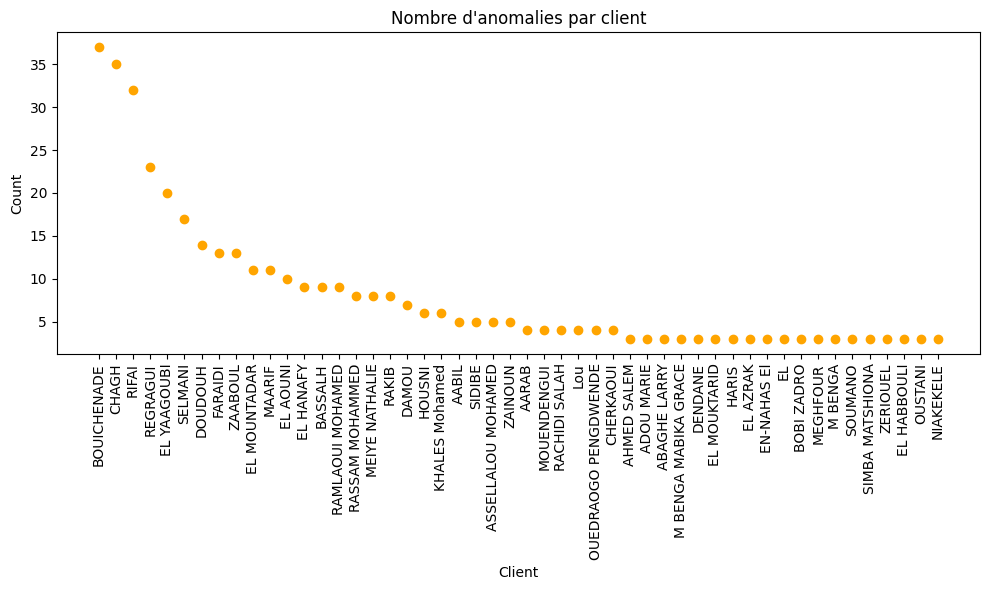

In [1793]:
# Visualization: Scatter plot for anomalies by client
plt.figure(figsize=figure_size)
plt.scatter(df_Valeurs_anormales_grouped_clients['Bénéficiaire_CPP'], df_Valeurs_anormales_grouped_clients['Count'], color='orange')
plt.title('Nombre d\'anomalies par client')
plt.xlabel('Client')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


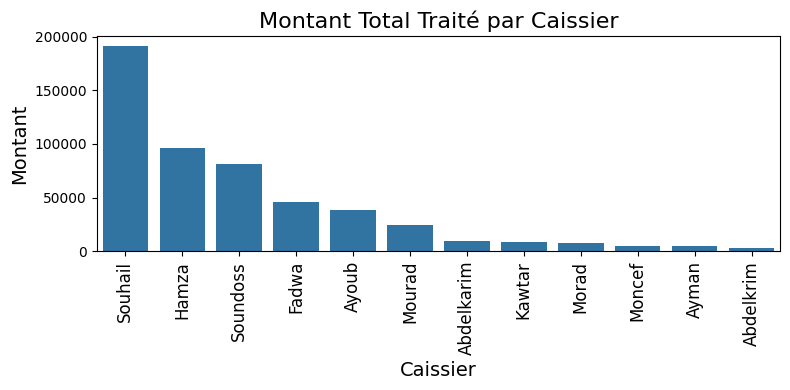

In [1794]:
grouped_caissier = df.groupby('Prenom User')['Montant_Rgl'].agg(['sum','count']).reset_index()
grouped_caissier = grouped_caissier.sort_values(by='sum',ascending=False)
#bar plot pour le Montant Total Traité par Caissier
plt.figure(figsize=(8,4))
sns.barplot(x='Prenom User', y='sum', data=grouped_caissier)


plt.title('Montant Total Traité par Caissier', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Caissier', fontsize=14)
plt.ylabel('Montant', fontsize=14)

plt.tight_layout()


plt.show()

C:\Users\Youcode\AppData\Local\Temp\ipykernel_16564\2988115106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Prenom User', y='count', data=grouped_caissier, palette='viridis')


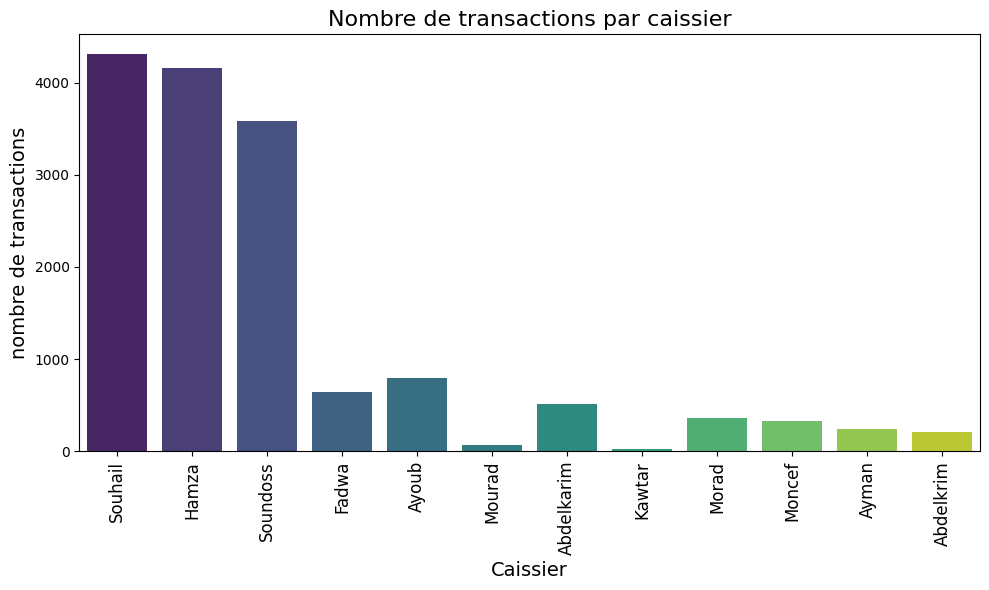

In [1795]:
plt.figure(figsize=figure_size)
sns.barplot(x='Prenom User', y='count', data=grouped_caissier, palette='viridis')
plt.title('Nombre de transactions par caissier',fontsize=16)

plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Caissier', fontsize=14)
plt.ylabel('nombre de transactions', fontsize=14)
plt.tight_layout()


plt.show()

Analyse de la relation entre le solde des cartes prepayees et les depenses des clients

In [1796]:
correlation = df[['Solde_CPP', 'Montant_Rgl']].corr()
print("Correlation entre le solde des cartes prepayees et les depenses des clients ")
print(correlation)

Correlation entre le solde des cartes prepayees et les depenses des clients 
             Solde_CPP  Montant_Rgl
Solde_CPP     1.000000     0.178339
Montant_Rgl   0.178339     1.000000


Visualiser la relation avec un nuage de points


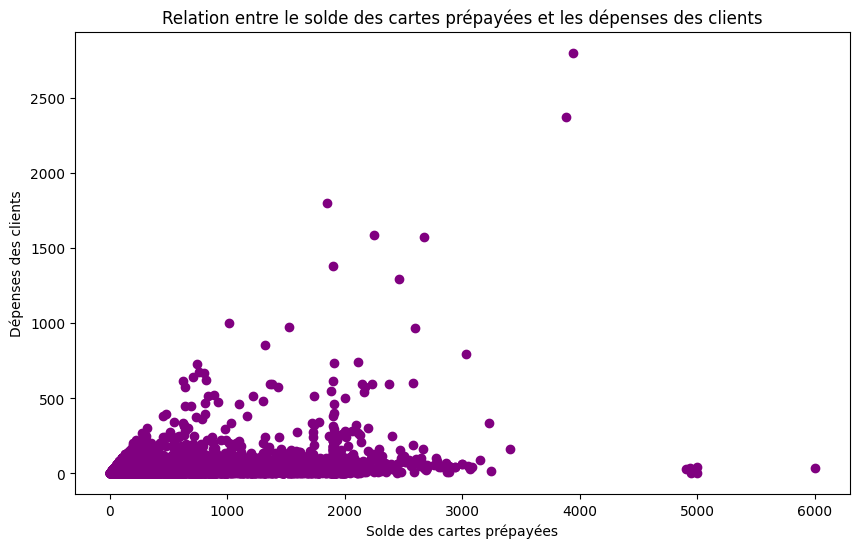

In [1797]:
plt.figure(figsize=figure_size)
plt.scatter(df['Solde_CPP'], df['Montant_Rgl'], color = 'purple') 
plt.xlabel('Solde des cartes prépayées')
plt.ylabel('Dépenses des clients')
plt.title('Relation entre le solde des cartes prépayées et les dépenses des clients')
plt.show()

Analyse de la relation en fonction du client


        Bénéficiaire_CPP  Solde_CPP  Montant_Rgl
0                  AABID     729.00   259.500000
1                  AABIL   71232.92  2824.900002
2                  AARAB  155300.56  7205.000000
3              AARIBECHE     130.50    28.000000
4                  AAYLA     914.09   184.625000
..                   ...        ...          ...
850            meryem el     369.50   108.000000
851               nassri     183.76    33.740000
852  nouhaila alaoui ait     159.00    36.000000
853               rhazal     295.02    30.000000
854                sylla     167.00    97.000000

[855 rows x 3 columns]


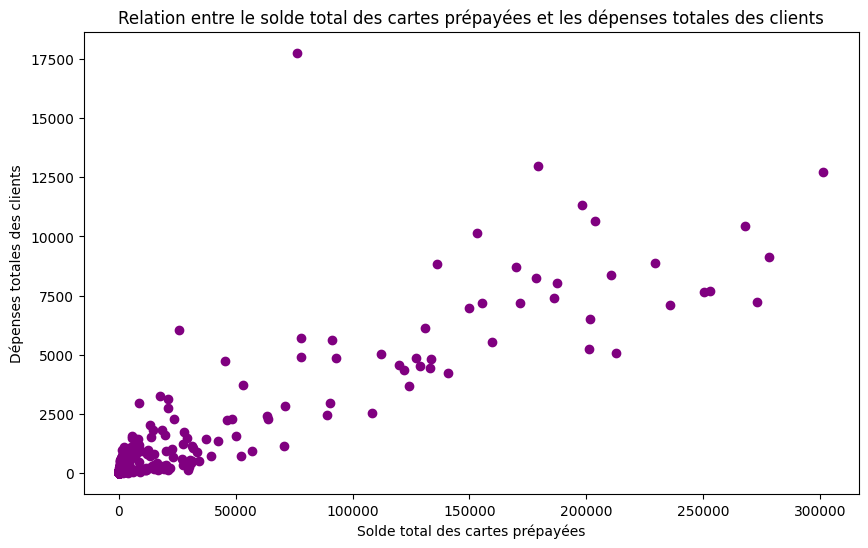

In [1798]:
client_spending_balance = df.groupby('Bénéficiaire_CPP').agg({'Solde_CPP': 'sum', 'Montant_Rgl': 'sum'}).reset_index()
print(client_spending_balance)
plt.figure(figsize=figure_size)
plt.scatter(client_spending_balance['Solde_CPP'], client_spending_balance['Montant_Rgl'], color = 'purple')
plt.xlabel('Solde total des cartes prépayées')
plt.ylabel('Dépenses totales des clients')
plt.title('Relation entre le solde total des cartes prépayées et les dépenses totales des clients')
plt.show()